In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("Crop_Production_data.csv")

In [10]:
data.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [11]:
data.shape


(246091, 7)

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [13]:
data.index

RangeIndex(start=0, stop=246091, step=1)

In [14]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

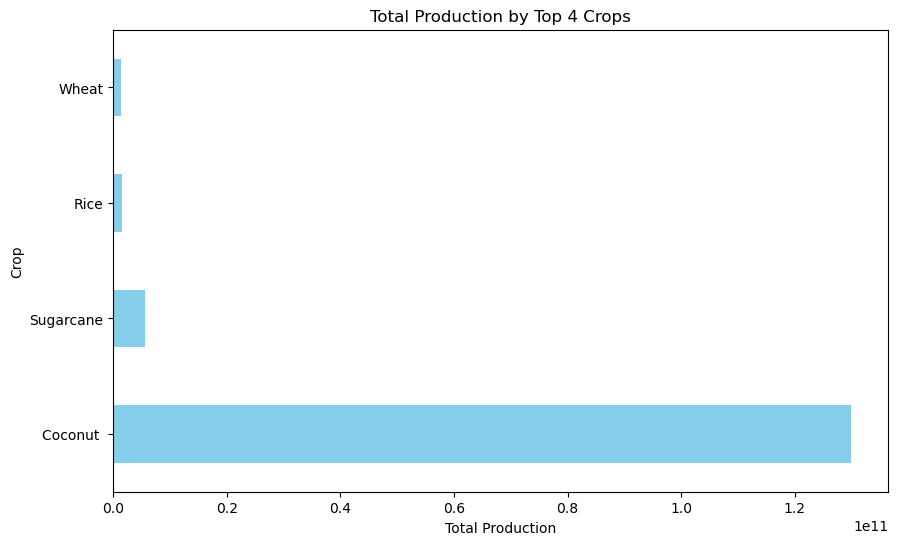

In [15]:
# Crop-wise production (Top 10 crops)
crop_production = data.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(4)
plt.figure(figsize=(10, 6))
crop_production.plot(kind='barh', color='skyblue')
plt.title('Total Production by Top 4 Crops')
plt.xlabel('Total Production')
plt.ylabel('Crop')
plt.show()


In [16]:


# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Get summary statistics
print(data.describe())


                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64
           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+

In [17]:
# Option 1: Fill missing values in 'Production' with the mean
data['Production'].fillna(data['Production'].mean(), inplace=True)

# Option 2: Drop rows with missing values in 'Production'
data.dropna(subset=['Production'], inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_23936\3886847895.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





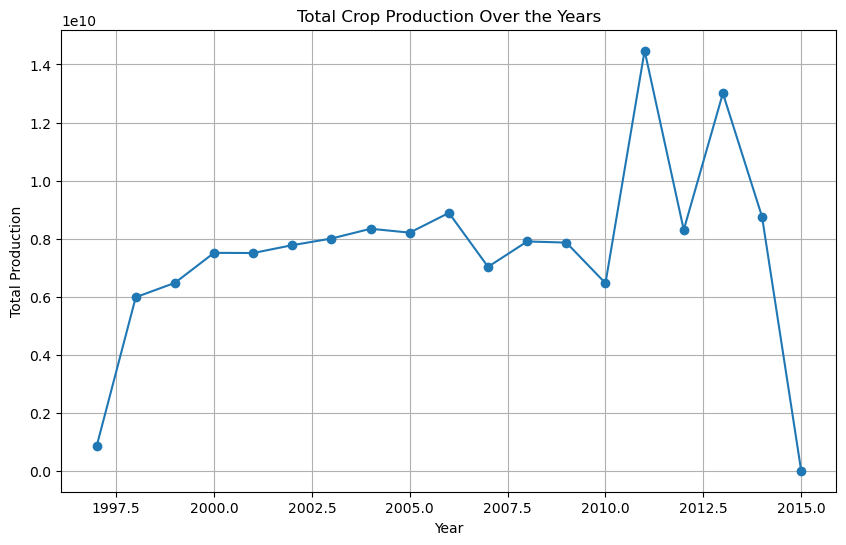

In [18]:


# Group data by Crop_Year to see production trends over time
production_by_year = data.groupby('Crop_Year')['Production'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(production_by_year['Crop_Year'], production_by_year['Production'], marker='o')
plt.title('Total Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid()
plt.show()


<Figure size 1200x800 with 0 Axes>

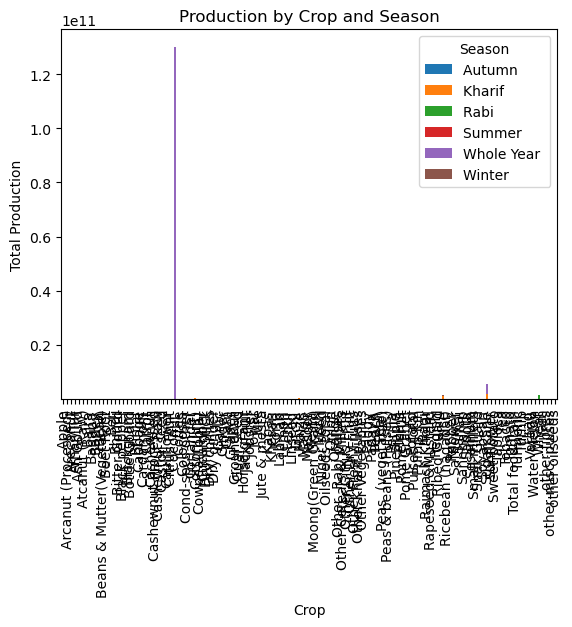

In [19]:

# Aggregating data by Crop and Season for total production
production_by_crop_season = data.groupby(['Crop', 'Season'])['Production'].sum().unstack()

# Plot
plt.figure(figsize=(12, 8))
production_by_crop_season.plot(kind='bar', stacked=True)
plt.title('Production by Crop and Season')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.legend(title='Season')
plt.show()


In [20]:

# Aggregate data by State and Crop for production
state_crop_production = data.groupby(['State_Name', 'Crop'])['Production'].sum().reset_index()

# Interactive plot
fig = px.bar(state_crop_production, x='State_Name', y='Production', color='Crop', 
             title="Crop Production by State", barmode='stack')
fig.update_layout(xaxis={'categoryorder':'total descending'}, 
                  xaxis_title='State', yaxis_title='Total Production')
fig.show()


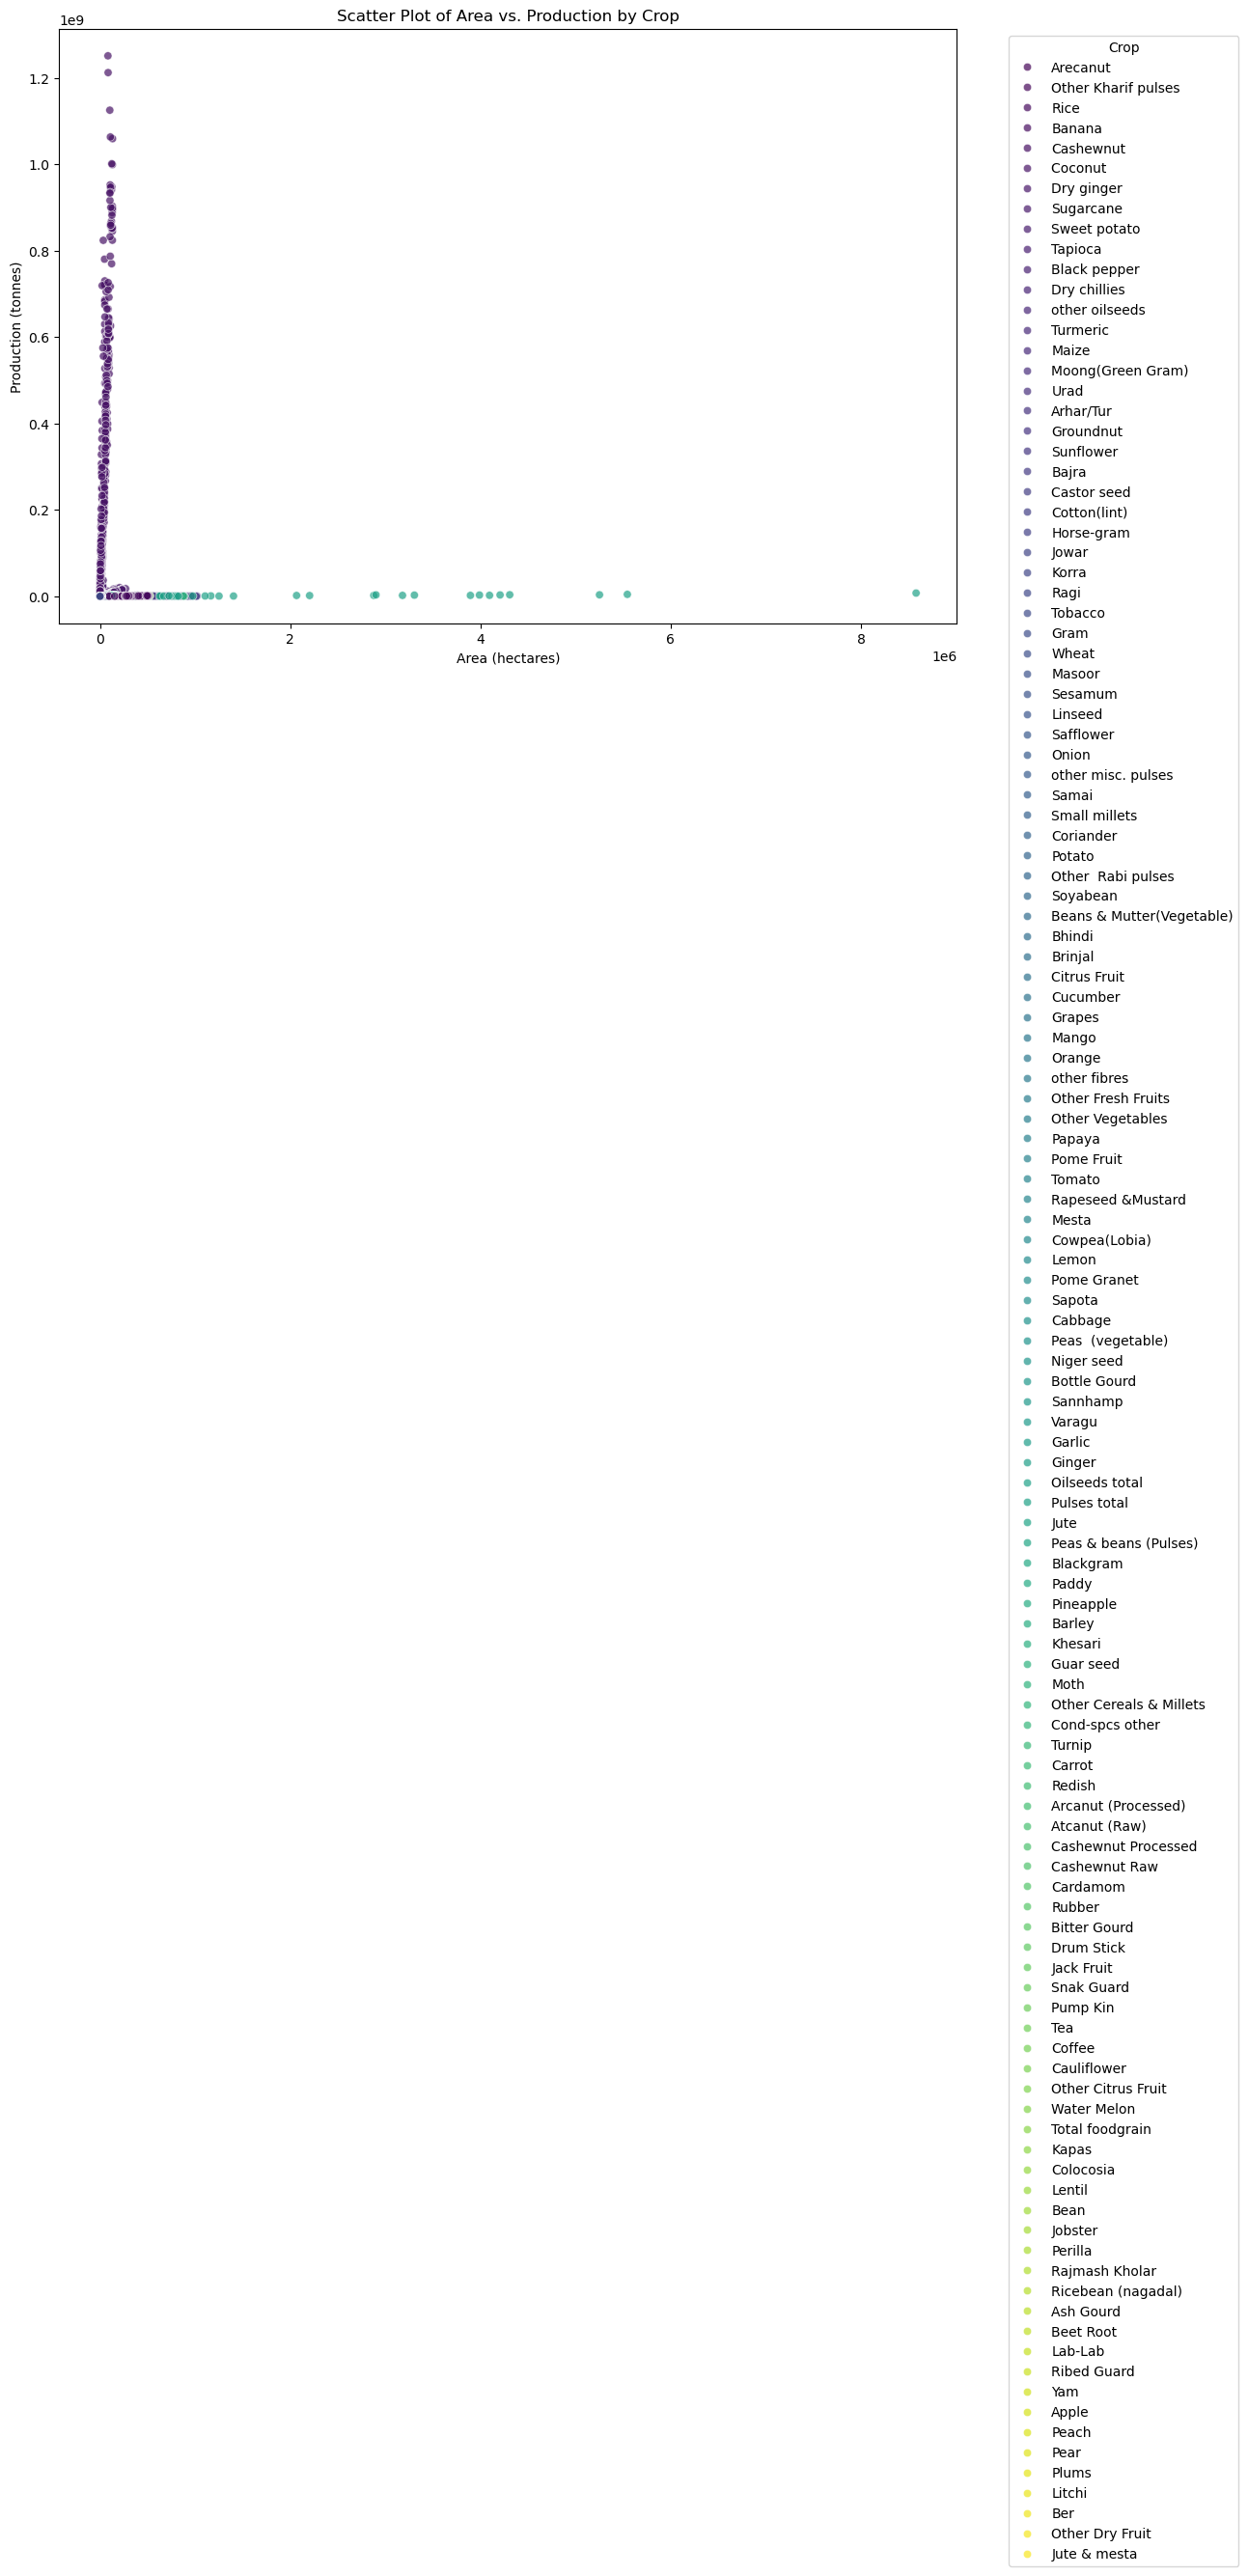

In [21]:


# Scatter plot of Area vs. Production, colored by Crop
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Area', y='Production', hue='Crop', alpha=0.7, palette='viridis')

plt.title('Scatter Plot of Area vs. Production by Crop')
plt.xlabel('Area (hectares)')
plt.ylabel('Production (tonnes)')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
